In [28]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np


In [2]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
data = pd.read_csv(url)
data

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33832,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33833,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33834,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33835,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [3]:
data = data.drop(['iso_code', 'continent','total_cases','total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'], axis= 1)

In [4]:
data

,location,date,new_cases
0,Afghanistan,2019-12-31,0.0
1,Afghanistan,2020-01-01,0.0
2,Afghanistan,2020-01-02,0.0
3,Afghanistan,2020-01-03,0.0
4,Afghanistan,2020-01-04,0.0
...,...,...,...
33832,International,2020-02-28,0.0
33833,International,2020-02-29,0.0
33834,International,2020-03-01,0.0
33835,International,2020-03-02,0.0


In [5]:
data = data[data['location'].isin(['Argentina','Chile','Colombia','Russia','Spain'])]
data.dropna(subset =['new_cases'], axis = 0, inplace = True)


In [18]:
col = data[data['location'].isin(['Colombia'])]
col

,location,date,c_average
6719,Colombia,2020-03-07,1.0
6722,Colombia,2020-03-10,2.0
6724,Colombia,2020-03-12,6.0
6726,Colombia,2020-03-14,7.0
6727,Colombia,2020-03-15,18.0
...,...,...,...
6861,Colombia,2020-07-27,8181.0
6862,Colombia,2020-07-28,8125.0
6863,Colombia,2020-07-29,10284.0
6864,Colombia,2020-07-30,8670.0


<class 'matplotlib.axes._subplots.AxesSubplot'>


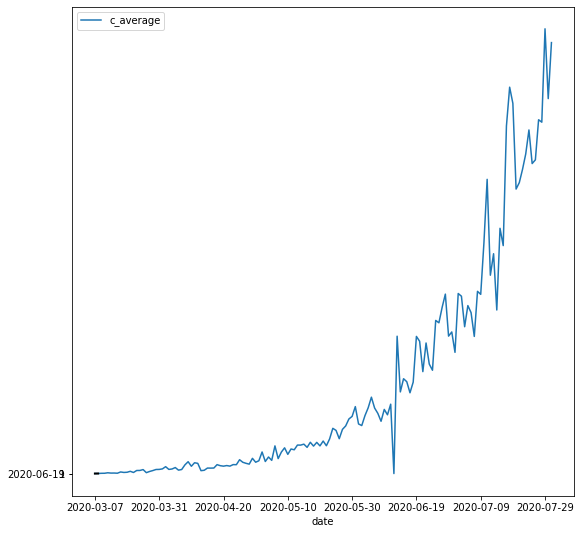

In [71]:
r = col.set_index('date').plot(figsize=(9,9))
print(type(r))
r.plot(['2020-06-19',1],['2020-06-19',1], 'k', lw=2)


In [6]:
data.rename(columns={'new_cases':'c_average'},inplace = True)

In [11]:
json_to_load = data.groupby('date').mean()
json_to_load

,c_average
date,
2019-12-31,0.0
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
...,...
2020-07-27,6302.2
2020-07-28,3544.2
2020-07-29,4895.4


In [30]:
json1 = json_to_load.to_json()
json1

'{"c_average":{"2019-12-31":0.0,"2020-01-01":0.0,"2020-01-02":0.0,"2020-01-03":0.0,"2020-01-04":0.0,"2020-01-05":0.0,"2020-01-06":0.0,"2020-01-07":0.0,"2020-01-08":0.0,"2020-01-09":0.0,"2020-01-10":0.0,"2020-01-11":0.0,"2020-01-12":0.0,"2020-01-13":0.0,"2020-01-14":0.0,"2020-01-15":0.0,"2020-01-16":0.0,"2020-01-17":0.0,"2020-01-18":0.0,"2020-01-19":0.0,"2020-01-20":0.0,"2020-01-21":0.0,"2020-01-22":0.0,"2020-01-23":0.0,"2020-01-24":0.0,"2020-01-25":0.0,"2020-01-26":0.0,"2020-01-27":0.0,"2020-01-28":0.0,"2020-01-29":0.0,"2020-01-30":0.0,"2020-01-31":0.0,"2020-02-01":1.5,"2020-02-02":0.0,"2020-02-03":0.0,"2020-02-04":0.0,"2020-02-05":0.0,"2020-02-06":0.0,"2020-02-07":0.0,"2020-02-08":0.0,"2020-02-09":0.0,"2020-02-10":0.5,"2020-02-11":0.0,"2020-02-12":0.0,"2020-02-13":0.0,"2020-02-14":0.0,"2020-02-15":0.0,"2020-02-16":0.0,"2020-02-17":0.0,"2020-02-18":0.0,"2020-02-19":0.0,"2020-02-20":0.0,"2020-02-21":0.0,"2020-02-22":0.0,"2020-02-23":0.0,"2020-02-24":0.0,"2020-02-25":0.5,"2020-02-26":3.0

In [7]:
data

,location,date,c_average
1113,Argentina,2020-03-04,1.0
1115,Argentina,2020-03-06,1.0
1116,Argentina,2020-03-07,6.0
1117,Argentina,2020-03-08,1.0
1118,Argentina,2020-03-09,3.0
...,...,...,...
28594,Spain,2020-07-26,0.0
28595,Spain,2020-07-27,6361.0
28596,Spain,2020-07-28,1828.0
28597,Spain,2020-07-29,2031.0
